# Application: Stationary State of Lorenz System

The [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system) is a simplified model of atmospheric convection that was an important early
model in the development of the theory of chaos in dynamical systems.

The model takes the form of a system of ODEs:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z 
\end{align*}

where $\sigma$, $\rho$, and $\beta$ are parameters in the model.

We want to find the stationary solutions, i.e., if we express
${\bf x} = (x, y, z)^\intercal$, then we want to find the ${\bf x}$'s
that give ${\bf f}({\bf x}) = 0$.

We can write the system as:
    
$$\dot{\bf x} = {\bf f}({\bf x})$$

with

$${\bf f}({\bf x}) = 
\left (
\begin{array}{c}
\sigma (y -x) \\
\rho x - y -xz \\
xy - \beta z
\end{array}
\right )$$

and the Jacobian of this system is:

$${\bf J} = \left (
\begin{array}{ccc}
-\sigma & \sigma & 0 \\
\rho-z & -1 & -x \\
y & x & -\beta
\end{array}
\right )$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# constants
# these are the values from Lorenz (1963) in section 7

sigma = 10.0
rho = 28.0
beta = 8./3.

In [15]:
def rhs(xvec):
    x, y, z = xvec
    
    xdot = sigma * (y - x)
    ydot = rho * x - y - x * z
    zdot = x * y - beta * z
    return np.array([xdot, ydot, zdot])

def jac(xvec):
    x, y, z = xvec
    
    return np.array([[-sigma, sigma, 0.0],
                     [rho - z, -1.0, -x],
                     [y, x, -beta]])

In [16]:
def lorenz_roots(xvec0):
    """given an initial guess xvec0, find the roots using Newton's method"""

    TOL = 1.e-8
    
    xvec = xvec0.copy()

    err = 1.e100

    while err > TOL:
        # get the jacobian
        J = jac(xvec)

        # get the current RHS
        f = rhs(xvec)

        # solve for the correction: J dx = -f
        dx = np.linalg.solve(J, -f)

        xvec += dx
        err = np.max(np.abs(dx))

    return xvec

We need to pick different initial guesses to find all of the roots

In [18]:
xvec = np.array([1., 1., 1.])
r1 = lorenz_roots(xvec)
r1

array([ 0.00000000e+00,  0.00000000e+00, -9.86076132e-32])

In [19]:
xvec = np.array([10., 10., 10.])
r2 = lorenz_roots(xvec)
r2

array([ 8.48528137,  8.48528137, 27.        ])

In [20]:
xvec = np.array([-10., -10., -10.])
r3 = lorenz_roots(xvec)
r3

array([-8.48528137, -8.48528137, 27.        ])

To complete this, let's plot a solution to the Lorenz system together with these stationary points.

We'll use the SciPy [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) function to do the integration.

In [21]:
from scipy import integrate

In [26]:
sol = integrate.solve_ivp(lambda t, y: rhs(y),
                          [0, 50], [-10, -10, -10],
                          rtol=1.e-8)

Text(0.5, 0, 'z')

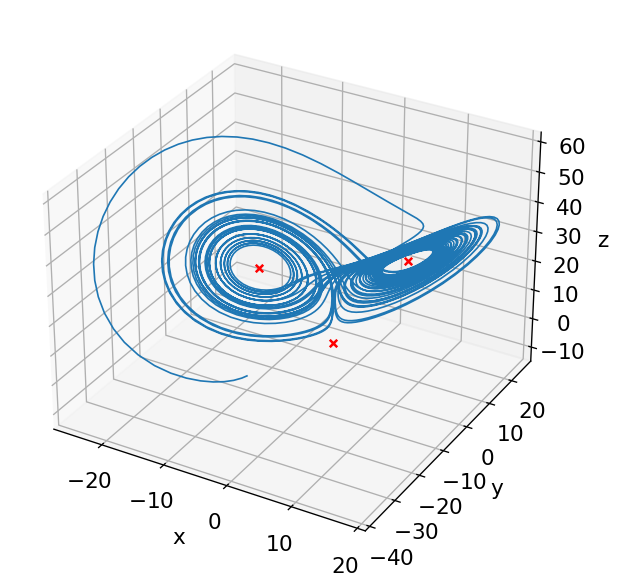

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot(sol.y[0, :], sol.y[1, :], sol.y[2, :], lw=1)

ax.scatter(r1[0], r1[1], r1[2], marker="x", color="r")
ax.scatter(r2[0], r2[1], r2[2], marker="x", color="r")
ax.scatter(r3[0], r3[1], r3[2], marker="x", color="r")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")